<a href="https://colab.research.google.com/github/sanjeev1996/Data-Extraction-_-Text-Analysis/blob/master/Tensorflow2_0_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install tensorflow-gpu==2.0.0

In [0]:
import tensorflow as tf
import numpy as np
rng = np.random
print(tf.__version__)

In [0]:
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [0]:
# Training Data
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0]
print(n_samples)

17


In [0]:
# Weight and Bias, initialized randomly
W = tf.Variable(rng.randn(), name='weight')
b = tf.Variable(rng.randn(), name='bias')

def linear_regression(x):
  return W*x + b

def mean_square(y_pred, y_true):
  return tf.reduce_sum(tf.pow(y_pred-y_true,2)) / (2*n_samples)

# Gradinet Descent Optimizer
optimizer = tf.optimizers.SGD(learning_rate)

In [0]:
# Optimzation process
def run_optimization():
  # computation inside a gardientTape for automatic differentiation
  with tf.GradientTape() as g:
    pred = linear_regression(X)
    loss = mean_square(pred,Y)
  
  gradients = g.gradient(loss, [W,b])
  optimizer.apply_gradients(zip(gradients, [W,b]))
  

In [0]:
# Run Training, number of steps
for step in range(1, training_steps+1):
  # update W and b values
  run_optimization()

  if step % display_step == 0:
    pred = linear_regression(X)
    loss = mean_square(pred, Y)
    print("step: %i, loss: %f, W: %f, b: %f" %(step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.078665, W: 0.275260, b: 0.631311
step: 100, loss: 0.078467, W: 0.273868, b: 0.641180
step: 150, loss: 0.078291, W: 0.272558, b: 0.650467
step: 200, loss: 0.078135, W: 0.271325, b: 0.659207
step: 250, loss: 0.077997, W: 0.270165, b: 0.667432
step: 300, loss: 0.077875, W: 0.269073, b: 0.675172
step: 350, loss: 0.077767, W: 0.268046, b: 0.682457
step: 400, loss: 0.077671, W: 0.267079, b: 0.689312
step: 450, loss: 0.077586, W: 0.266169, b: 0.695763
step: 500, loss: 0.077511, W: 0.265312, b: 0.701834
step: 550, loss: 0.077444, W: 0.264507, b: 0.707548
step: 600, loss: 0.077385, W: 0.263748, b: 0.712924
step: 650, loss: 0.077333, W: 0.263034, b: 0.717984
step: 700, loss: 0.077287, W: 0.262363, b: 0.722746
step: 750, loss: 0.077246, W: 0.261731, b: 0.727227
step: 800, loss: 0.077210, W: 0.261136, b: 0.731445
step: 850, loss: 0.077178, W: 0.260576, b: 0.735413
step: 900, loss: 0.077149, W: 0.260049, b: 0.739148
step: 950, loss: 0.077124, W: 0.259553, b: 0.742663
step: 1000, l

In [0]:
import matplotlib.pyplot as plt

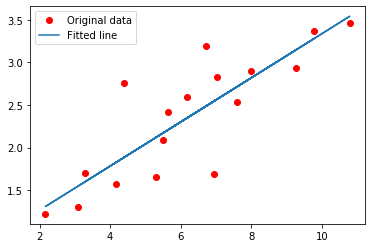

In [0]:
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W*X + b), label = 'Fitted line')
plt.legend()
plt.show()